<a href="https://colab.research.google.com/github/eduardopadilla3/DS-Unit-4-Sprint-1-NLP/blob/main/module2-vector-representations/EP_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [ ]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/eduardopadilla3/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv')

In [ ]:
df = df[['description', 'title']]

In [ ]:
from bs4 import BeautifulSoup
import requests
import html



def clean_text(text):
    #soup = BeautifulSoup(text,features='html.parser')
    #text = soup.get_text()

    text = BeautifulSoup(html.unescape(text), "lxml").text
    
    #text = re.sub(r"http[s]?://\S+", "", text)
    #text = re.sub(r"\s+", " ", text)
    text = text.replace('\\n',' ')
    
    text = text.replace('\\xe2\\x80\\x93',' ')
    text = text.replace('\\xe2\\x80\\x99',' ')
    text = text.replace('\\xe2\\x80\\xa6',' ')
    text = text.replace('\\xe2\\x80\\x94',' ')
    text = text.replace('\\xc2\\xa8','')
    text = text[1:]
    text = re.sub('[^a-zA-Z 0-9]','',text)
    return text



In [ ]:
df['description'] = df['description'].apply(clean_text)

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df.head()

,description,title
0,Job Requirements Conceptual understanding in Machine Learning models like Naive Bayes KMeans SVM Apriori Linear Logistic Regression Neural Random Forests Decision Trees KNN along with handson experience in at least 2 of them Intermediate to expert level coding skills in PythonR Ability to write functions clean and efficient data manipulation are mandatory for this role Exposure to packages like NumPy SciPy Pandas Matplotlib etc in Python or GGPlot2 dplyr tidyR in R Ability to communicate Model findings to both Technical and NonTechnical stake holders Hands on experience in SQLHive or similar programming language Must show past work via GitHub Kaggle or any other published article Masters degree in StatisticsMathematicsComputer Science or any other quant specific field Apply Now,Data scientist
1,Job Description As a Data Scientist 1 you will help us build machine learning models data pipelines and microservices to help our clients navigate their healthcare journey You will do so by empowering and improving the next generation of Accolade Applications and user experiences A day in the life Work with a small agile team to design and develop mobile applications in an iterative fashion Work with a tightknit group of development team members in Seattle Contribute to best practices and help guide the future of our applications Operates effectively as a collaborative member of the development team Operates effectively as an individual for quick turnaround of enhancements and fixes Responsible for meeting expectations and deliverables on time with high quality Drive and implement new features within our mobile applications Perform thorough manual testing and writing test cases that cover all areas Identify new development toolsapproaches that will increase code quality efficiency and best practices Develop and champion the the development processes coding style guidelines and architectural designs necessary to innovate and maintain great product quality Effectively turns design documents and graphics into performant usable UI Demonstrates creative technical and analytical skills Demonstrates ability to communicate effectively in both technical and business environments Qualifications What we are looking for Master s Degree in Computer Science Math or related field Computer Science fundamentals as illustrated through algorithm design problem solving and complexity analysis Must have 1 year realworld experience developing and deploying microservices or data pipelines Must have a fundamental understanding of key machine learning concepts such as accuracy measures crossvalidation and open source machine learning libraries Fluent in Python and SQL Proficient with writing unitfunctional tests and familiar with automation frameworks Experience with cloud infrastructure such as AWS or Azure is a plus Experience with distributed data pipelines such as a Spark is a plus Strong written and oral communication skills Desire and willingness to work in an Agile collaborative innovative flexible and teamoriented environment Handson detailoriented methodical inquisitive A motivated selfstarter with a solid level of experience that quickly grasps complex challenges A skillful communicator with experience working with technical management teams A service oriented person who thinks Customer First Fast fail entrepreneurial spirit Thrives in a fastpaced environment where continuous improvement is the norm and the bar for quality is extremely high Excited by the challenges of working in a product team undergoing rapid international growth Additional Information What is important to us Creating an enduring company that is hyperfocused on our culture and making a meaningful impact in the lives of our employees members and customers The secret to our success is We find joy and purpose in serving others Making a difference in our members and customers lives is what we do Even when it s hard we do the right thing for the right reasons We are 

## 2) Use Spacy to tokenize the listings 

In [ ]:
##### Your Code Here #####
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
pip install -U spacy==2.2.2

Requirement already up-to-date: spacy==2.2.2 in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [ ]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_md")


In [ ]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [ ]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [ ]:
df['tokens'].head()

0                                        [Job, Requirements, Conceptual, understanding, in, Machine, Learning, models, like, Naive, Bayes, KMeans, SVM, Apriori, Linear, Logistic, Regression, Neural, Random, Forests, Decision, Trees, KNN, along, with, handson, experience, in, at, least, 2, of, them, Intermediate, to, expert, level, coding, skills, in, PythonR, Ability, to, write, functions, clean, and, efficient, data, manipulation, are, mandatory, for, this, role, Exposure, to, packages, like, NumPy, SciPy, Pandas, Matplotlib, etc, in, Python, or, GGPlot2, dplyr, tidyR, in, R, Ability, to, communicate, Model, findings, to, both, Technical, and, NonTechnical, stake, holders, Hands, on, experience, in, SQLHive, or, similar, programming, language, Must, show, past, work, via, GitHub, Kaggle, ...]
1                                                                                       [Job, Description,  , As, a, Data, Scientist, 1, you, will, help, us, build, machine, learning, models, dat

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(df['description'])

# Get sparse dtm
dtm = vect.transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [ ]:
dtm.head()

,10,100,12,2019,40,401k,ab,abilities,ability,able,academic,access,accommodation,accuracy,achieve,acquisition,act,action,actionable,actively,activities,ad,addition,additional,address,adhoc,ads,advance,advanced,advertising,age,agencies,agency,agile,ai,algorithm,algorithms,allow,alongside,amazon,...,validation,value,values,variety,various,verbal,veteran,veterans,video,vision,visit,visual,visualization,visualizations,voice,walmart,want,way,ways,web,welcome,wide,work,workforce,working,workplace,works,world,worldwide,write,writing,written,xc2xb7,xc2xbb,xefx83x98,year,years,york,youll,youre
0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,4,0,2,0,0,1,0,0,2,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 4) Visualize the most common word counts

In [ ]:
# Dependencies for the week (instead of conda)
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2020-09-30 15:12:39--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     137  --.-KB/s    in 0s      

2020-09-30 15:12:39 (6.82 MB/s) - ‘requirements.txt’ saved [137/137]

     |████████████████████████████████| 24.2MB 6.6MB/s 
     |████████████████████████████████| 1.6MB 54.8MB/s 
     |████████████████████████████████| 10.4MB 54.2MB/s 
     |████████████████████████████████| 7.1MB 45.4MB/s 
     |████████████████████████████████| 215kB 55.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=a43924afaf60c5bf0bb2d945970578a559a

In [ ]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
##### Your Code Here 
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [ ]:
wc = count(df['tokens'])

In [ ]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
19,and,425,11531,1.0,0.054871,0.054871,0.997653
90,to,422,6777,2.0,0.032249,0.087120,0.990610
167,the,414,4945,3.0,0.023531,0.110651,0.971831
55,of,420,4561,4.0,0.021704,0.132355,0.985915
40,in,421,3448,5.0,0.016408,0.148763,0.988263


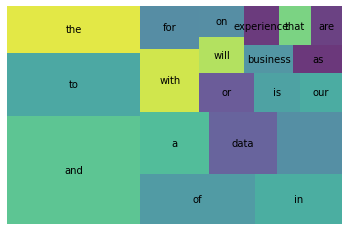

In [ ]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
#tfidf = TfidfVectorizer(max_features=1000)  # To compare to above

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['description'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,02,10,100,1000,100000,1020,105000,1079302,11,12,125000,13,14,140000,15,16,17,18,180,1800flowerscom,1strategy,20,200,2000,200000,2012,2013,2015,2017,2018,2019,2020,23,24,247,25,30,300,30328,35,...,xbox,xc2xb7,xc2xbb,xdivisionfunction,xe2x80x98big,xe2x80x98real,xe2x80x98think,xe2x80x9cbest,xe2x80x9cbig,xe2x80x9clive,xe2x80x9cmachine,xe2x80x9cmake,xe2x80x9cplantxe2x80x9d,xe2x80x9csurge,xe2x80x9cteam,xe2x80x9ctraditionalxe2x80x9d,xe2x80x9cwhole,xe2x80x9cwhyxe2x80x9d,xe2x80x9cwork,xefx82xa7,xefx83x98,xgboost,xpo,year,years,yearthe,yes,yeti,york,youd,youll,young,youre,youve,yrs,zenreach,zeus,zf,zillow,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045476,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.111217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.28451201, 1.28621286, 1.30047779, 1.31185378]]),
 array([[  0, 276, 274, 366, 115]]))

In [ ]:
ideal_ds_job = ["""
Lead the exploitation of the player-tracking dataset, converting 2-Dimensions and 3-Dimensions raw data into physical, technical and tactical basketball concepts and insights.
Develop models to accurately evaluate and forecast player and team performance. Contribute to the development of basketball thought and workflow optimization of the department and the organization as a whole.
                
"""]

In [ ]:
new = tfidf.transform(ideal_ds_job)

In [ ]:
new

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [ ]:
new.todense()[:5]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
nn.kneighbors(new.todense())

(array([[1.32330898, 1.33534104, 1.34750933, 1.34750933, 1.34786949]]),
 array([[262, 353, 339, 333,   8]]))

In [ ]:
df['description'][262]

'The ARVR team at Facebook is helping more people around the world come together and connect through worldclass hardware and software With global departments dedicated to research computer vision haptics social interaction and more ARVR is committed to driving the state of the art forward through relentless innovation  The ARVR Core Tech Org explores develops and helps deliver cuttingedge technologies that serve as the foundation of current and future ARVR products From mixed reality and human interaction to natural inputs and beyond Core Tech is focused on taking new technologies from early concept to the product level while iterating prototyping and realizing the human value and new experiences they open up  Were looking for a creative Data Scientist to help usher in the next era of humancomputer interaction The Data Scientist will be responsible for architecting and implementing endtoend datadriven solutions to drive algorithm development into the expanding landscape of virtual and 

In [ ]:
df['description'][339]

'At YETI we believe that time spent outdoors matters more than ever and our gear can make that time extraordinary When you work here youll have the opportunity to create exceptional meaningful work and problem solve with innovative team members by your side Together youll help our customers get the highquality gear they need to make the most of their adventures We are built for the wild  The Data Scientist will lead the development and delivery of statistical forecast modeling and advanced analytics capabilities for YETI in Sales Supply Chain Demand Planning Marketing and ECommerce This position will primarily leverage R and R Studio to develop operational forecasts and advanced analytics to be imbedded in functional dashboards to drive insights throughout the organization  Responsibilities  Develop and maintain algorithms and statistical models for demand in Sales Marketing Supply Chain and Demand Planning Establish predictive analytics utilizing statistical models and hybrid models t

In [ ]:
df['description'][8]

'MS in a quantitative discipline such as Statistics Mathematics Physics Engineering Computer Science or Economics5 years work experienceProficiency in at least one statistical software package such as Python R or MatlabExpertise using SQL for acquiring and transforming dataOutstanding quantitative modeling and statistical analysis skillsExcellent verbal and written communication skills with the ability to effectively advocate technical solutions to research scientists engineering teams and business audiences  Where will Amazons growth come from in the next year What about over the next five Which product lines are poised to quintuple in size Are we investing enough in our infrastructure or too much How do our customers react to changes in prices product selection or delivery times These are among the most important questions at Amazon today The Topline Forecast team in the Supply Chain Optimization Technologies SCOT organization is dedicated to answering these questions using statistic

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 